# Homework 4

Created by: Frendy

Date: 11/15/2020

The image folder has the images given for the homework

The output folder has the images that were created for the homework (Example: image1_crop.jpg)

# Dependencies

Please have the common libraries listed belowed installed.

In case you don't have it. Please install it by typing the following

## matplotlib
pip3 install matplotlib

## scipy
pip3 install scipy

## numpy
pip3 install numpy

## skimage
pip3 install scikit-image


In [1]:
############
# Numpy makes my computer run out of memory, fix it by forcing to not do multi threading
###########
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

import numpy as np

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks,  plot_matches
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

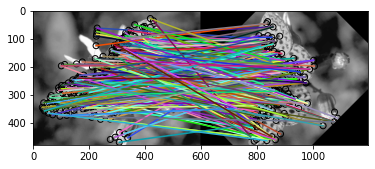

In [3]:
#########################
# Problem 1 a
#########################

#########################
# Detection
########################
# Read the 2 images 
image1 = cv2.imread('images/butterfly.png', 0)
image2 = cv2.imread('images/butterfly_rotated.png', 0)

#Detect feature points using Harris corner detector
coords1 = corner_peaks(corner_harris(image1), min_distance=5, threshold_rel=0.02)
coords2 = corner_peaks(corner_harris(image2), min_distance=5, threshold_rel=0.02)

#########################
# Description
######################## 
def description(corner_peaks, image):
    x = image.shape[0]
    y = image.shape[1]
    
    n = len(corner_peaks)
    intensity = []
    for i in range(n):
        tempx = corner_peaks[i][0]
        tempy = corner_peaks[i][1]
        
        neighborhood = []
        for row in range(-2,3):
            for col in range(-2,3):
                if tempx + row < 0 or tempx + row > x -1:
                        neighborhood.append(0)
                elif tempy + col < 0 or tempy + col > y - 1:
                    neighborhood.append(0)
                else:
                    neighborhood.append(image[tempx + row][tempy + col])
        
        intensity.append(sum(neighborhood))
    return intensity

description1 = description(coords1, image1)
description2 = description(coords2, image2)

#########################
# Matching
######################## 
match = np.zeros((len(coords1), 2), dtype = np.int8)

for i in range(len(description1)):
    minSSD = 0
    minIndex = 0
    
    for j in range(len(description2)):
        ssd = (description1[i] - description2[j])**2
        
        if j == 0:
            minSSD = ssd
        elif ssd < minSSD:
            minSSD = ssd
            minIndex = j
    
    match[i, 0] = i
    match[i, 1] = minIndex

# Use plot_matches
ax = plt.subplot()
    
plot_matches(ax, image1, image2, coords1, coords2, match)
plt.savefig('output/test.jpg')
plt.show()
    
    
    


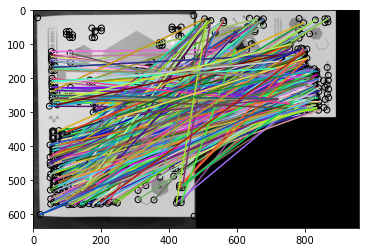

In [4]:
#########################
# Problem 1 b
#########################

#########################
# Detection
########################
# Read the 2 images 
image1 = cv2.imread('images/book_org.jpg', 0)
image2 = cv2.imread('images/book_small.jpg', 0)

#Detect feature points using Harris corner detector
coords1 = corner_peaks(corner_harris(image1), min_distance=5, threshold_rel=0.02)
coords2 = corner_peaks(corner_harris(image2), min_distance=5, threshold_rel=0.02)

#########################
# Description
######################## 
def description(corner_peaks, image):
    x = image.shape[0]
    y = image.shape[1]
    
    n = len(corner_peaks)
    intensity = []
    for i in range(n):
        tempx = corner_peaks[i][0]
        tempy = corner_peaks[i][1]
        
        neighborhood = []
        for row in range(-2,3):
            for col in range(-2,3):
                if tempx + row < 0 or tempx + row > x -1:
                        neighborhood.append(0)
                elif tempy + col < 0 or tempy + col > y - 1:
                    neighborhood.append(0)
                else:
                    neighborhood.append(image[tempx + row][tempy + col])
        
        intensity.append(sum(neighborhood))
    return intensity

description1 = description(coords1, image1)
description2 = description(coords2, image2)

#########################
# Matching
######################## 
match = np.zeros((len(coords1), 2), dtype = np.int8)

for i in range(len(description1)):
    minSSD = 0
    minIndex = 0
    
    for j in range(len(description2)):
        ssd = (description1[i] - description2[j])**2
        
        if j == 0:
            minSSD = ssd
        elif ssd < minSSD:
            minSSD = ssd
            minIndex = j
    
    match[i, 0] = i
    match[i, 1] = minIndex

# Use plot_matches
ax = plt.subplot()
    
plot_matches(ax, image1, image2, coords1, coords2, match)
plt.savefig('output/book_scaled_matches.jpg')
plt.show()
    
    
    


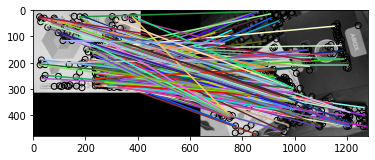

In [5]:
#########################
# Problem 1 b
#########################

#########################
# Detection
########################
# Read the 2 images 
image1 = cv2.imread('images/book_small.jpg', 0)
image2 = cv2.imread('images/book_clutter.jpg', 0)

#Detect feature points using Harris corner detector
coords1 = corner_peaks(corner_harris(image1), min_distance=5, threshold_rel=0.02)
coords2 = corner_peaks(corner_harris(image2), min_distance=5, threshold_rel=0.02)

#########################
# Description
######################## 
def description(corner_peaks, image):
    x = image.shape[0]
    y = image.shape[1]
    
    n = len(corner_peaks)
    intensity = []
    for i in range(n):
        tempx = corner_peaks[i][0]
        tempy = corner_peaks[i][1]
        
        neighborhood = []
        for row in range(-2,3):
            for col in range(-2,3):
                if tempx + row < 0 or tempx + row > x -1:
                        neighborhood.append(0)
                elif tempy + col < 0 or tempy + col > y - 1:
                    neighborhood.append(0)
                else:
                    neighborhood.append(image[tempx + row][tempy + col])
        
        intensity.append(sum(neighborhood))
    return intensity

description1 = description(coords1, image1)
description2 = description(coords2, image2)

#########################
# Matching
######################## 
match = np.zeros((len(coords1), 2), dtype = np.int8)

for i in range(len(description1)):
    minSSD = 0
    minIndex = 0
    
    for j in range(len(description2)):
        ssd = (description1[i] - description2[j])**2
        
        if j == 0:
            minSSD = ssd
        elif ssd < minSSD:
            minSSD = ssd
            minIndex = j
    
    match[i, 0] = i
    match[i, 1] = minIndex

# Use plot_matches
ax = plt.subplot()
    
plot_matches(ax, image1, image2, coords1, coords2, match)
plt.savefig('output/book_clutter_matches.jpg')
plt.show()
    
    
    


In [6]:
#########################
# Problem 2 a
#########################
def hough_line_transform(edges, d_binsize = 1, theta_binsize = 1):
    thetaArray = np.deg2rad(np.arange(-90/theta_binsize, 90/theta_binsize))
    cos_t = np.cos(thetaArray)
    sin_t = np.sin(thetaArray)
    num_thetas = len(thetaArray)    
    # Initialize accumulator: H(theta, d) = 0
    H = np.zeros((num_thetas,2*d_binsize), dtype=np.uint64)
    
    # Each edge point should be (x,y)    
    for i in edges:
        x = i[0]
        y = i[1]
        for theta in range(num_thetas):
            d = round(x*cos_t[theta] + y*sin_t[theta])
            H[theta, d] += 1
    
    # Find the values of (theta,d) where H is maximum
    idx = np.argmax(H)
    distance = []
    theta = []
    
    counter = 0
    for x in H[idx]:
        # First value is theta
        if counter == 0:
            theta.append(x)
            counter = 1
    
        else:
        # SEcond value is d
            distance.append(x)
            counter = 0
    
    return H, distance, theta

# test
edges = [[0,0], [1,1]]
H, distance, theta = hough_line_transform(edges)

print(H)
print(distance)
print(theta)

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [2 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

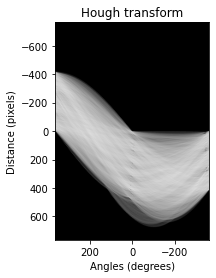

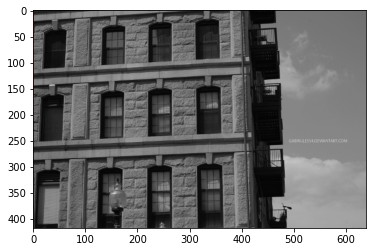

In [7]:
#########################
# Problem 2 b
#########################

from skimage import feature
from skimage.feature import peak_local_max, canny
from skimage.transform import hough_line
from matplotlib import cm
from skimage.color import gray2rgb

##########################
# (1)
##########################
img = cv2.imread('images/building.jpg', 0)
edges = canny(img)

##########################
# (2)
##########################
# Used in build function instead because my function doesnt work
H, theta, d = hough_line(edges)

##########################
# (3)
##########################
coordinates = peak_local_max(H)

##########################
# (4)
##########################
plt.imshow(np.log(1 + H), extent=[np.rad2deg(theta[-1])*4, np.rad2deg(theta[0])*4,
           d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.show()

# Original image with lines detected
img = gray2rgb(img)
for i in coordinates:
    x, y = H[i]
    img[x,y] = (255,0,0)

plt.imshow(img)
plt.show()

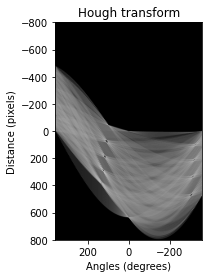

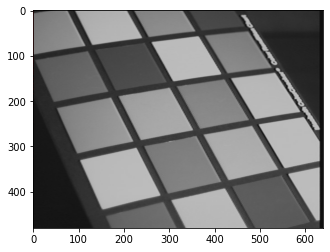

In [8]:
#########################
# Problem 2 C BOARD
#########################

from skimage import feature
from skimage.feature import peak_local_max, canny
from skimage.transform import hough_line
from matplotlib import cm

##########################
# (1)
##########################
img = cv2.imread('images/board.jpg', 0)
edges = canny(img)

##########################
# (2)
##########################
# Used in build function instead because my function doesnt work
H, theta, d = hough_line(edges)

##########################
# (3)
##########################
coordinates = peak_local_max(H)

##########################
# (4)
##########################
plt.imshow(np.log(1 + H), extent=[np.rad2deg(theta[-1])*4, np.rad2deg(theta[0])*4,
           d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.show()

# Original image with lines detected
img = gray2rgb(img)
for i in coordinates:
    x, y = H[i]
    img[x,y] = (255,0,0)

plt.imshow(img)
plt.savefig('output/board_lines_dbin0_tbin0.jpg')
plt.show()

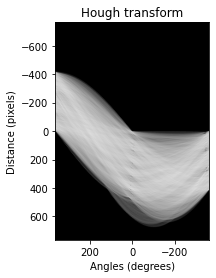

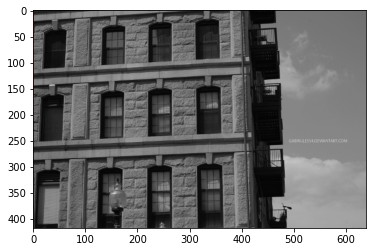

In [9]:
#########################
# Problem 2 C BUILDING
#########################

from skimage import feature
from skimage.feature import peak_local_max, canny
from skimage.transform import hough_line
from matplotlib import cm

##########################
# (1)
##########################
img = cv2.imread('images/building.jpg', 0)
edges = canny(img)

##########################
# (2)
##########################
# Used in build function instead because my function doesnt work
H, theta, d = hough_line(edges)

##########################
# (3)
##########################
coordinates = peak_local_max(H)

##########################
# (4)
##########################
plt.imshow(np.log(1 + H), extent=[np.rad2deg(theta[-1])*4, np.rad2deg(theta[0])*4,
           d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.show()

# Original image with lines detected
img = gray2rgb(img)
for i in coordinates:
    x, y = H[i]
    img[x,y] = (255,0,0)

plt.imshow(img)
plt.savefig('output/buildinglines_dbin0_tbin0.jpg')
plt.show()

In [10]:
#########################
# Problem 2 D - EXTRA CREDIT
#########################

# Compute gradient orientation at edges found by canny edge detection
img = cv2.imread('images/building.jpg', 0)
edges = canny(img)

# More efficient HOugh Transform
def hough_line_transform(edges, d_binsize = 1, theta_binsize = 1):
    thetaArray = np.deg2rad(np.arange(-90/theta_binsize, 90/theta_binsize))
    cos_t = np.cos(thetaArray)
    sin_t = np.sin(thetaArray)
    num_thetas = len(thetaArray)    
    # Initialize accumulator: H(theta, d) = 0
    H = np.zeros((num_thetas,2*d_binsize), dtype=np.uint64)
    temp = cv2.imread('images/building.jpg', 0)
    sobel_x = cv2.Sobel(temp, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(temp, cv2.CV_64F, 0, 1)
    
    # Each edge point should be (x,y)    
    for i in edges:
        x = i[0]
        y = i[1]
        for theta in range(num_thetas):
            theta = np.arctan(sobel_y[theta]/sobel_x[theta])
            theta = round(theta)
            d = round(x*cos_t[theta] + y*sin_t[theta])
            H[theta, d] += 1
    
    # Find the values of (theta,d) where H is maximum
    idx = np.argmax(H)
    distance = []
    theta = []
    
    counter = 0
    for x in H[idx]:
        # First value is theta
        if counter == 0:
            theta.append(x)
            counter = 1
    
        else:
        # SEcond value is d
            distance.append(x)
            counter = 0
    
    return H, distance, theta

# test
edges = [[0,0], [1,1]]
H, distance, theta = hough_line_transform(edges)

print(H)
print(distance)
print(theta)

#################
# The implementation in d should be faster than a
##################

/home/frendy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


TypeError: type numpy.ndarray doesn't define __round__ method